# Unemployment Analysis 

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

**Importing Data**

In [2]:
df=pd.read_csv('Unemployement.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


# Getting some basic information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [4]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [5]:
#checking null values
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [6]:
df.shape

(768, 7)

In [7]:
#droping null values
df.dropna(inplace=True)
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [8]:
df.shape

(740, 7)

In [9]:
df.Region.value_counts()

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: Region, dtype: int64

**Renaming the columns**

In [10]:

df.columns=['state','date','frequency','estimated unemployment rate','estimated employed','estimated labour participation rate','area']

In [11]:
df.head()

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


**Changing the data type of date attribute**

In [12]:
df['date']=pd.to_datetime(df['date'],dayfirst=True)

**Extracting month from the date attribute**

In [13]:
df['month_int']=df['date'].dt.month
df.head()

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,area,month_int
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9


<Axes: >

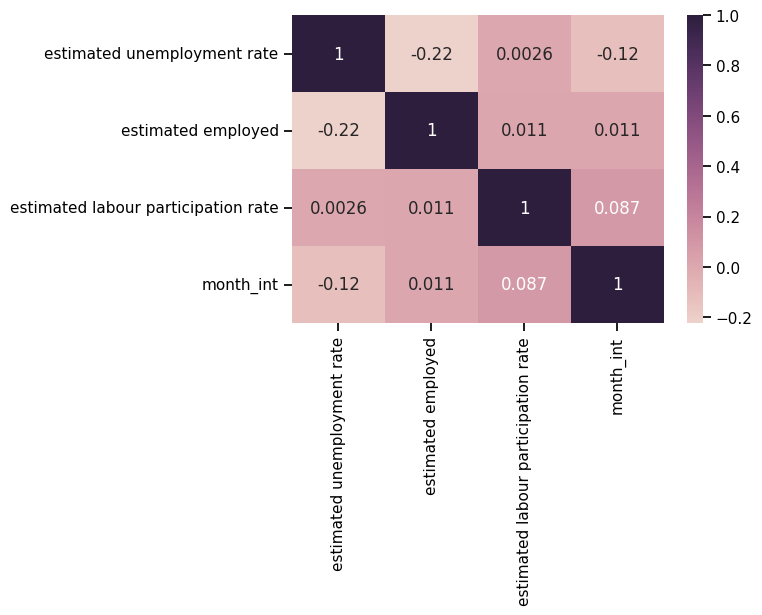

In [14]:
heatmap= df[['estimated unemployment rate', 'estimated employed', 'estimated labour participation rate', 'area' , 'month_int']]
heatmap = heatmap.corr()
plt.figure(figsize=(6,4))
sns.set_context('notebook', font_scale=1)
sns.heatmap(data=heatmap, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

# Unemployment Analysis: Data Visualization

In [15]:
df['estimated employed'] = df['estimated employed']. astype(int)
df['estimated employed'].info
df.head()

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,area,month_int
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139,43.24,Rural,5
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881,42.05,Rural,6
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707,43.50,Rural,7
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693,43.97,Rural,8
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762,44.68,Rural,9


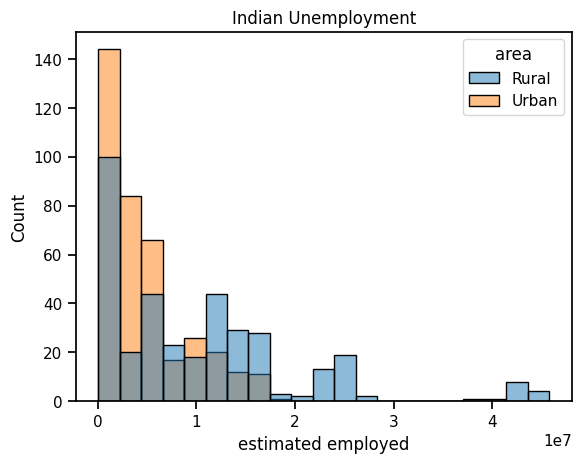

In [16]:
#The estimated number of employees according to different area of India:
df.columns= ["state","date","frequency",
               "estimated unemployment rate","estimated employed",
               "estimated labour participation rate",
               "area","month_int"]
plt.title("Indian Unemployment")
sns.histplot(x='estimated employed', hue='area', data=df)
plt.show()

In [17]:
df['area'].unique()

array(['Rural', 'Urban'], dtype=object)

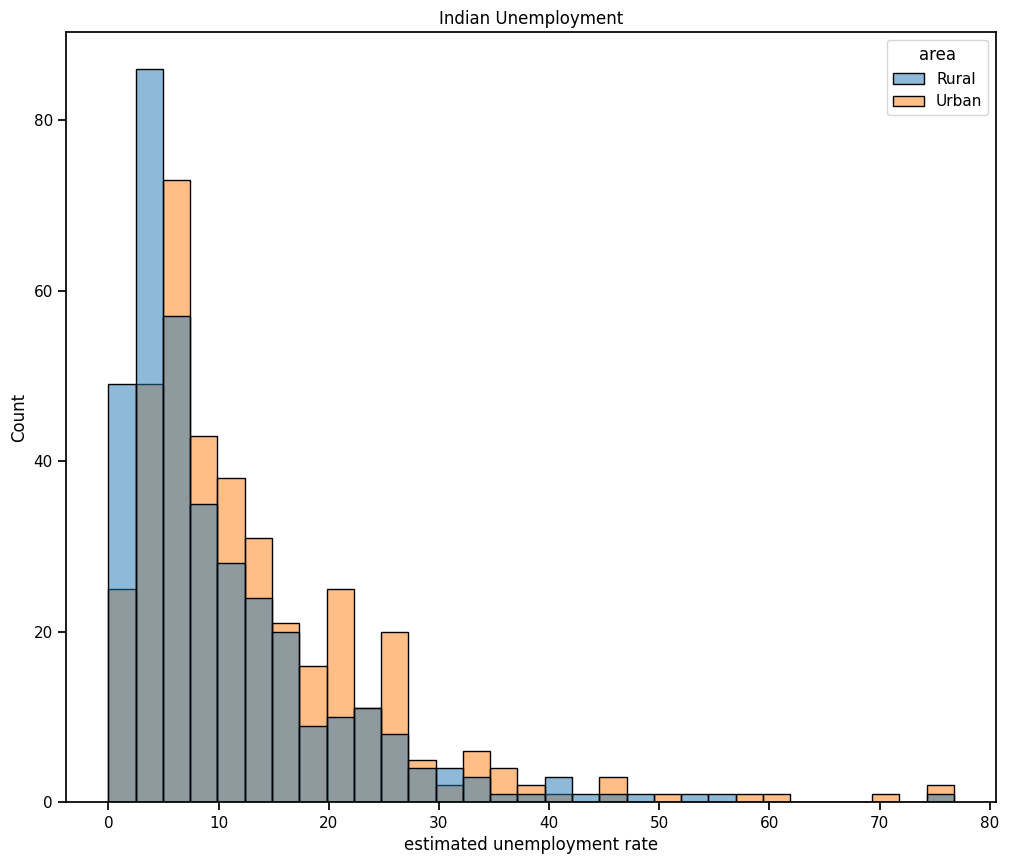

In [18]:
#The unemployment rate according to different area of India:
plt.figure(figsize=(12, 10))
plt.title("Indian Unemployment")
sns.histplot(x="estimated unemployment rate", hue="area", data=df)
plt.show()

In [19]:
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [20]:
#Boxplot of Unemployment rate per States
fig = px.box(df, x='state', y='estimated unemployment rate', color='state', title='Unemployment rate per States', template='seaborn')

# Updating the x-axis category order to be in descending total
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

In [21]:
#Scatter matrix showing relationships between unemployment rate, employment, and labor participation rate, color-coded by region.
fig = px.scatter_matrix(df, template='plotly',
                        dimensions=['estimated unemployment rate', 'estimated employed', 'estimated labour participation rate'],
                        color='area')
fig.show()

In [22]:
#Bar chart displaying the average unemployment rate in each state, color-coded by state.
plot_ump = df[['estimated unemployment rate', 'state']]
data_unemp = plot_ump.groupby('state').mean().reset_index()
data_unemp = data_unemp.sort_values('estimated unemployment rate')
fig = px.bar(data_unemp, x='state', y='estimated unemployment rate', color='state',
             title='Average Unemployment Rate in each state', template='plotly')
fig.show()

In [23]:
#dashboard to analyze the unemployment rate of each Indian state by area.
unemploment = df[["state", "area", "estimated unemployment rate"]]
figure = px.sunburst(unemploment, path=["area", "state"], 
                     values="estimated unemployment rate", 
                     width=700, height=700, color_continuous_scale="RdY1Gn", 
                     title="Unemployment Rate in India")
figure.show()

In [24]:
#data representation before and after the lockdown
after_lockdown = df[(df['month_int'] >= 4) & (df['month_int'] <=6)]
before_lockdown = df[(df['month_int'] >= 1) & (df['month_int'] <=4)]

In [25]:
af_lockdown=after_lockdown.groupby('state')['estimated unemployment rate'].mean().reset_index()
lockdown= before_lockdown.groupby('state')['estimated unemployment rate'].mean().reset_index()
lockdown['unemployment rate before lockdown'] = af_lockdown['estimated unemployment rate']

lockdown.columns=['state','unemployment rate before lockdown','unemployment rate after lockdown']
lockdown.head()

,state,unemployment rate before lockdown,unemployment rate after lockdown
0,Andhra Pradesh,10.756250,11.126000
1,Assam,6.750000,6.563333
2,Bihar,23.690000,27.459000
3,Chandigarh,19.366667,12.656667
4,Chhattisgarh,9.028750,12.720000


In [26]:
#Unemployment rate change after lockdown
lockdown['rate change in unemployment']=round(lockdown['unemployment rate before lockdown']-lockdown['unemployment rate before lockdown']
                                             /lockdown['unemployment rate after lockdown'],2)

In [27]:
import plotly.express as px

fig = px.bar(lockdown, x='state', y='rate change in unemployment', color='rate change in unemployment',
             title='Percentage change in unemployment rate in each state after lockdown', template='ggplot2')
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()

**Most impacted States/Union Territories**


**1. Puducherry**

**2. Jharkhand**

**3. Bihar**

**4. Haryana**

**5. Tripura**